In [1]:
import pandas as pd
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/anubhav08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Text Reviews.csv')
df.dtypes

title    object
dtype: object

In [3]:
print(df.shape)

(28, 1)


In [4]:
messages = " ".join([str(i) for i in df['title']])
words = word_tokenize(messages)

In [5]:
messages

"Very compact to store. Makes chutney paste in minutes. Very handy for for grinding powder for sambar, amty. I'm writing this review after using it for more than one year. This mixer grinder is of average quality. The jar lids are of poor quality and when closing the lids they pop out in a few seconds, have to keep holding the lids by hand to keep the jars closed during grinding. Initially I didn't hold the lids tightly by hand and whatever I was grinding flew out of the jars messed up my kitchen. I realized now looking at some of the photos posted by other buyers that the manufacturer did not provide the rubber gaskets for the lids in my box. That's why I have been struggling to use this mixer. This mixer motor needs a lot of effort for dry and wet grinding and the motor turned off in less than 2 minutes several times in the last year alone. This is a waste of money for this grinder. Also several of the reviews are fake as you will get a small card in the box that if you give positive

In [6]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [7]:
lowered = clean_words(words)

In [8]:
bow = Counter(lowered)
bow

Counter({'compact': 1,
         'store': 1,
         'make': 1,
         'chutney': 1,
         'paste': 1,
         'minute': 3,
         'handy': 1,
         'grinding': 4,
         'powder': 1,
         'sambar': 1,
         'amty': 1,
         'writing': 1,
         'review': 4,
         'using': 3,
         'one': 1,
         'year': 3,
         'mixer': 8,
         'grinder': 4,
         'average': 1,
         'quality': 6,
         'jar': 6,
         'lid': 5,
         'poor': 3,
         'closing': 1,
         'pop': 1,
         'second': 1,
         'keep': 2,
         'holding': 1,
         'hand': 2,
         'closed': 1,
         'initially': 1,
         'hold': 1,
         'tightly': 1,
         'whatever': 1,
         'flew': 1,
         'messed': 1,
         'kitchen': 1,
         'realized': 1,
         'looking': 4,
         'photo': 1,
         'posted': 1,
         'buyer': 1,
         'manufacturer': 2,
         'provide': 1,
         'rubber': 1,
         'gasket':

In [9]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [10]:
data = data.head(10)

<AxesSubplot:xlabel='frequency', ylabel='word'>

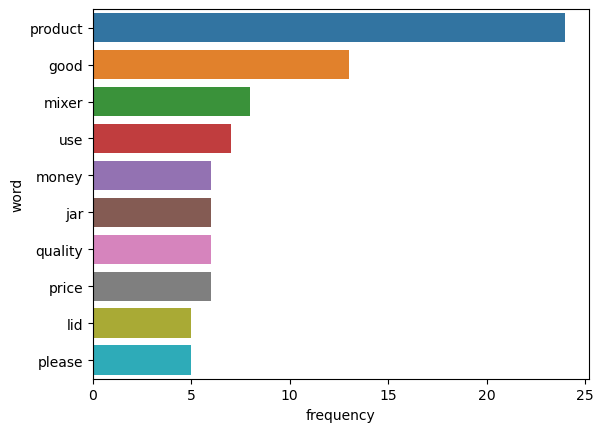

In [11]:
sns.barplot(x='frequency',y='word',data=data)